In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [32]:
fts_sel = pd.read_csv('../Output/Submission/features/Features_Selected.csv')
fts_sel = fts_sel['Feature'].values

df_fts = pd.read_csv('../Output/Submission/features/features_all.csv')
df_fts = df_fts[df_fts['ContourType'] == 'Manual']
df_fts['Selected'] = 0
df_fts.loc[df_fts['Feature'].isin(fts_sel), 'Selected'] = 1


In [33]:
df_cluster_labels = pd.DataFrame()
labels_dir = '../Output/Submission/Clustering/Labels/'
csvs = os.listdir(labels_dir)

for csv in csvs:
    df = pd.read_csv(labels_dir + csv)
    df['PatID'] = csv.split('.')[0]
    df_cluster_labels = pd.concat([df_cluster_labels, df])


fts_clustered = df_cluster_labels['Feature'].unique()

df_cluster_labels

,Feature,ClusterLabel,ClusterNumFts,PatID
0,firstorder_10Percentile,50051,7,1029
1,firstorder_90Percentile,40063,3,1029
2,firstorder_Entropy,100051,7,1029
3,firstorder_InterquartileRange,40062,6,1029
4,firstorder_Kurtosis,3,4,1029
...,...,...,...,...
67,gldm_SmallDependenceHighGrayLevelEmphasis,70052,6,955
68,gldm_SmallDependenceLowGrayLevelEmphasis,70052,6,955
69,ngtdm_Complexity,60031,8,955
70,ngtdm_Contrast,60032,6,955


In [34]:
df_fts = df_fts[df_fts['Feature'].isin(fts_clustered)]
df_cluster_labels['PatID'] = df_cluster_labels['PatID'].astype(str)
df_fts['PatID'] = df_fts['PatID'].astype(str)
df_fts = df_fts.merge(df_cluster_labels, on=['Feature', 'PatID'], how='left')



# rescale every feature to 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for ft in fts_clustered:
    df_fts.loc[df_fts['Feature'] == ft, 'FeatureValue'] = scaler.fit_transform(df_fts.loc[df_fts['Feature'] == ft, 'FeatureValue'].values.reshape(-1, 1))



df_fts.sample(5)

,Unnamed: 0,Unnamed: 0.1,PatID,Fraction,Contour,ContourType,Feature,FeatureValue,Selected,ClusterLabel,ClusterNumFts
2610,9773,143,1553,2,RP,Manual,glcm_Contrast,0.592044,0,4,6
3841,13204,364,955,4,MS,Manual,glcm_Idmn,0.872704,0,1,2
3531,12216,446,1540,5,RP,Manual,firstorder_InterquartileRange,0.528302,0,7,5
6479,19794,534,1481,5,RP,Manual,ngtdm_Strength,0.633258,0,30061,7
6011,19099,374,1601,4,RP,Manual,glcm_SumAverage,0.099379,0,30051,7


1029
17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

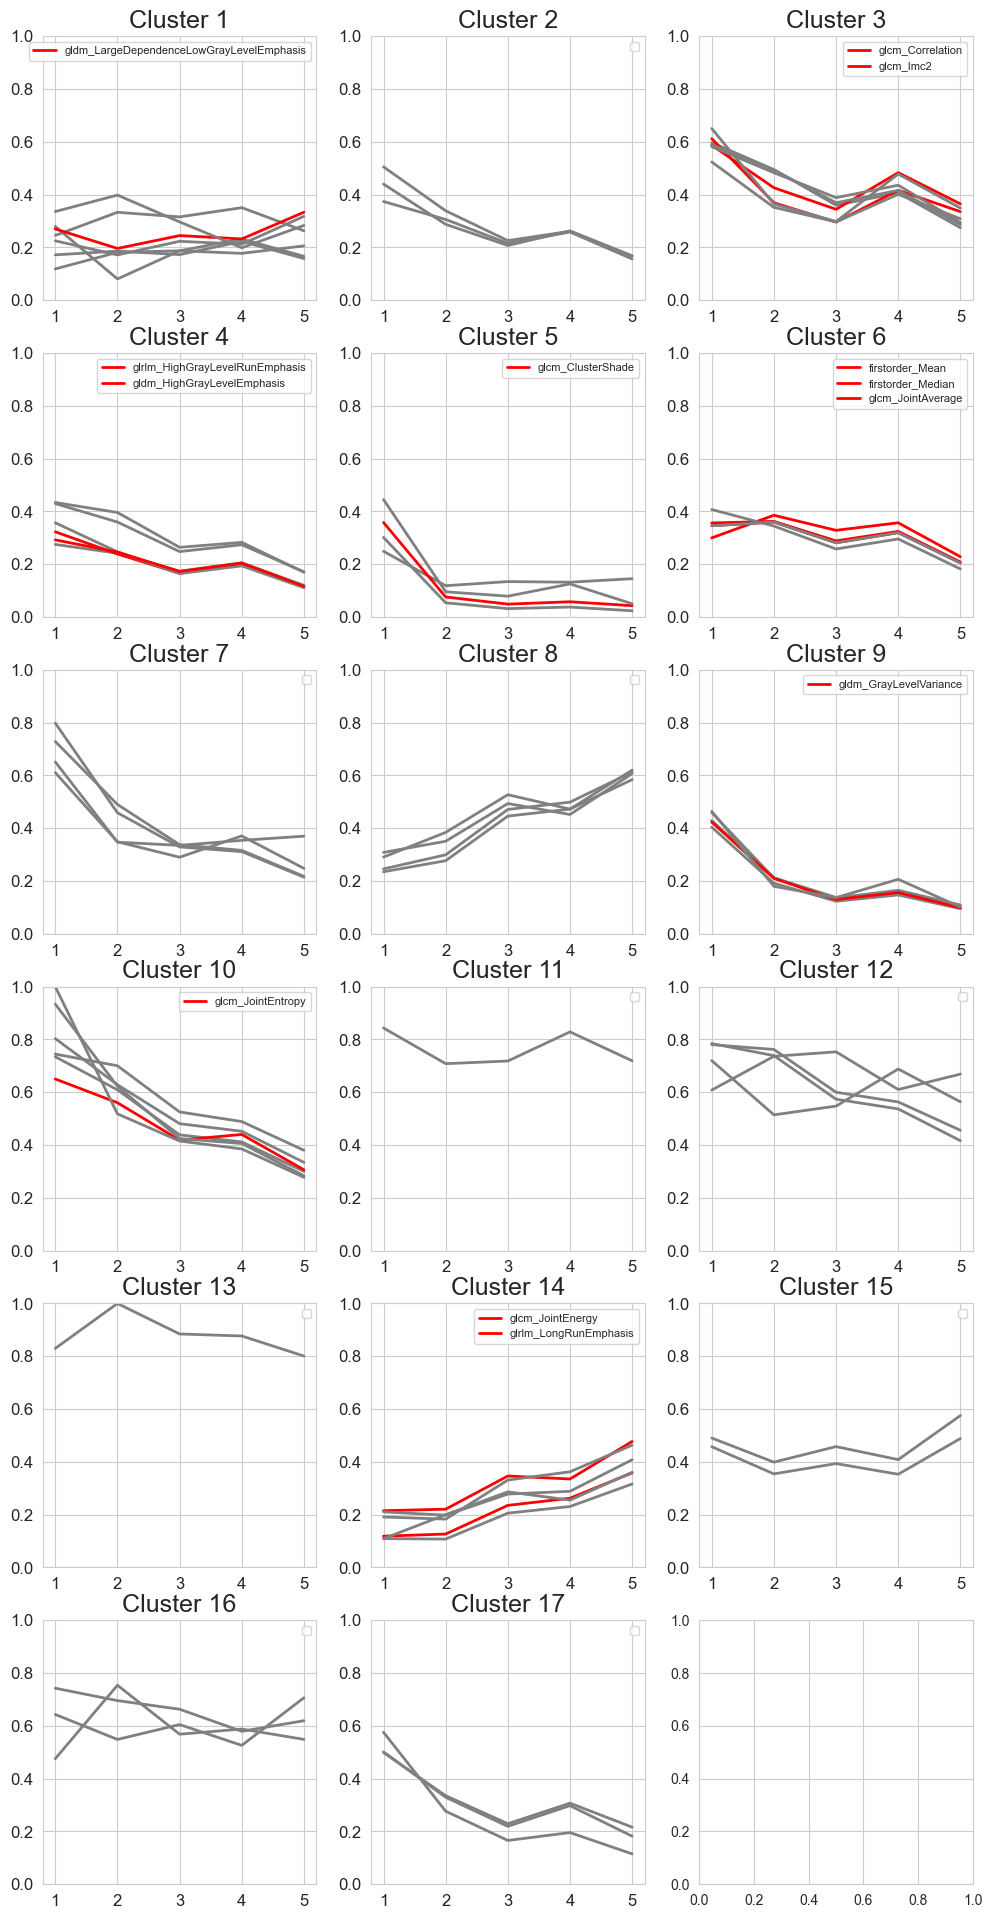

In [61]:
# loop through each feature and lineplot for each cluster
rand_pats = np.random.choice(df_fts['PatID'].unique(), 1, replace=False)
sns.set_style('whitegrid')

for pat in rand_pats:
    df_pat = df_fts[df_fts['PatID'] == pat]

    print(pat)

    # need to pivot the table based on fraction and feature value
    print(df_pat['ClusterLabel'].nunique())
    # make a subplot that is 4 plots per row
    num_rows = int(np.ceil(df_pat['ClusterLabel'].nunique() / 3))
    fig, axs = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))

    for i, cluster in enumerate(df_pat['ClusterLabel'].unique()):
        df_cluster = df_pat[df_pat['ClusterLabel'] == cluster]

        if num_rows > 1:
            ax = axs[i // 3, i % 3]
        else:
            ax = axs[i]

        fts_cluster = df_cluster['Feature'].unique()
        for ft in fts_cluster:
            df_ft = df_cluster[df_cluster['Feature'] == ft]
            color = 'grey' if df_ft['Selected'].values[0] == 0 else 'red'
            label = ft if df_ft['Selected'].values[0] == 1 else None
            ax.plot(df_ft['Fraction'], df_ft['FeatureValue'], color=color, linewidth=2, label=label)
        ax.set_title(f'Cluster {i + 1}', fontsize=18)
        ax.set_ylim(0, 1)
        ax.set_xticks(np.arange(1, 5.1, 1))
        ax.legend(loc='upper right', fontsize=8)

        ax.yaxis.set_tick_params(labelsize=12)
        ax.xaxis.set_tick_params(labelsize=12)

        # if plot is empty, remove it
        if len(fts_cluster) == 0:
            fig.delaxes(ax)
    plt.savefig('./ExampleCluster/Patient2.png', dpi=300, bbox_inches='tight')
    plt.show()
    

<Figure size 640x480 with 0 Axes>

In [ ]:
# loop through each feature and lineplot for each cluster
rand_pats = np.random.choice(df_fts['PatID'].unique(), 5, replace=False)


for pat in rand_pats:
    df_pat = df_fts[df_fts['PatID'] == pat]
    
    rand_clusters = np.random.choice(df_pat['ClusterLabel'].unique(), 20, replace=False)
    for i, cluster in enumerate(rand_clusters):
        df_cluster = df_pat[df_pat['ClusterLabel'] == cluster]
        
        sns.set_style('whitegrid')
        fig, ax = plt.subplots(figsize=(4, 4))


        for ft in df_cluster['Feature'].unique():

            selected = df_cluster[df_cluster['Feature'] == ft]['Selected'].values[0]
            if selected == 1:
                color = 'r'
                label = ft
            else:
                color = 'black'
                label = None
            
            plt.plot(df_cluster[df_cluster['Feature'] == ft]['FeatureValue'].values,
                      label=label, color=color, 
                      marker = 'o', markersize=5, linewidth=2)
            
        ax.set_xlabel('Fraction', fontsize=20)
        ax.set_ylabel('Feature Value', fontsize=20)
        #ax.set_xlim([0.95, 5.05])
        ax.set_ylim([0, 1.0])
        ax.set_xticks(np.arange(0, 4.1, 1))
        ax.set_xticklabels(np.arange(1, 6, 1), fontsize=15)
#        ax.set_xlim([0, 4])
        ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=15)
        plt.title(f'Cluster - {i + 1}', fontsize=20)
        #plt.legend(loc='upper right', fontsize=15, title='Selected Feature', title_fontsize=15)
        
        # for axis in ['bottom','left']:
        #     ax.spines[axis].set_linewidth(2)
        #     ax.spines[axis].set_color('black')
        
        plt.show()
        plt.savefig(f'../Visualisation/Plots/ClustersNew/{pat}_{cluster}.png', dpi=300)
        plt.close()
        
        

NameError: name 'np' is not defined

In [ ]:
# plot all of clusters for patient 1302
df_pat = df_fts[df_fts['PatID'] == '1088']


for i, cluster in enumerate(df_pat['ClusterLabel'].unique()):

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.set_style('whitegrid')

    # plot
    for ft in df_pat[df_pat['ClusterLabel'] == cluster]['Feature'].unique():

        selected = df_pat[df_pat['Feature'] == ft]['Selected'].values[0]
        if selected == 1:
            color = 'r'
            label = ft
            alpha = 1
        else:
            color = 'black'
            label = ft
            alpha = 0.5

        plt.plot(df_pat[df_pat['Feature'] == ft]['FeatureValue'].values,
                  label=label, color=color, alpha=alpha,
                  marker = 'o', markersize=5, linewidth=2)
        
    
    ax.set_xlabel('Fraction', fontsize=20)
    ax.set_ylabel('Feature Value', fontsize=20)
    ax.set_xlim([-0.05, 4.05])
    ax.set_ylim([0, 1.0])
    ax.set_xticks(np.arange(0, 4.1, 1))
    ax.set_xticklabels(np.arange(1, 6, 1), fontsize=15)
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=15)
    plt.title(f'PatID: 2 - Cluster: {i+1}', fontsize=20, pad=20)
    plt.legend(loc='upper right', fontsize=14, title='Features', title_fontsize=15)

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('grey')

    plt.savefig(f'../Visualisation/Plots/1302Clusters/1088_{i+1}.png')
        
    

In [ ]:
# create a figure of 2x8 subplots to show all clusters for patient 1302
fig, axs = plt.subplots(8, 2, figsize=(14, 20))

img_dir = '../Visualisation/Plots/1302Clusters/'
imgs = os.listdir(img_dir)

for i, img in enumerate(imgs):
    img = plt.imread(img_dir + img)
    axs[i//2, i%2].imshow(img)
    axs[i//2, i%2].axis('off')




# remove whitespace
plt.subplots_adjust(wspace=0, hspace=0)

# plt.savefig('../Visualisation/Plots/1302ClustersAll.png')

In [ ]:
# plot all of clusters for patient 1302
df_pat = df_fts[df_fts['PatID'] == '1302']


for i, cluster in enumerate(df_pat['ClusterLabel'].unique()):

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.set_style('whitegrid')

    # plot
    for ft in df_pat[df_pat['ClusterLabel'] == cluster]['Feature'].unique():

        selected = df_pat[df_pat['Feature'] == ft]['Selected'].values[0]
        if selected == 1:
            color = 'r'
            label = ft
            alpha = 1
        else:
            color = 'black'
            label = ft
            alpha = 0.5

        plt.plot(df_pat[df_pat['Feature'] == ft]['FeatureValue'].values,
                  label=label, color=color, alpha=alpha,
                  marker = 'o', markersize=5, linewidth=2)
        
    
    ax.set_xlabel('Fraction', fontsize=20)
    ax.set_ylabel('Feature Value', fontsize=20)
    ax.set_xlim([0.0, 4.05])
    ax.set_ylim([0, 1.0])
    ax.set_xticks(np.arange(0, 4.1, 1))
    ax.set_xticklabels(np.arange(1, 6, 1), fontsize=15)
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=15)
    plt.title(f'PatID: 5 - Cluster: {i+1}', fontsize=20, pad=20)
    plt.legend(loc='upper right', fontsize=14, title='Features', title_fontsize=15)

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('grey')

    plt.savefig(f'../Visualisation/Plots/1302Clusters/1302_{i+1}.png')
        

In [ ]:
df_fts_cluster = df_ft.merge(df_cluster_labels, on='Feature', how='left')
df_fts_cluster = df_fts_cluster.dropna()

for cluster in [80071]:
    # lineplot of feature values
    df_plot = df_fts_cluster.loc[df_fts_cluster['ClusterLabel'] == cluster]
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_context("paper", font_scale=1.5)
    sns.set_theme(style='darkgrid', rc=custom_params)
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    #plt.title('Cluster ' + str(cluster))
    # plot
    for f in df_plot['Feature'].unique():
        if df_plot.loc[df_plot['Feature'] == f, 'Selected'].values[0] == 1:
            sns.lineplot(data=df_plot.loc[df_plot['Feature'] == f], x='Fraction', y='FeatureValue', 
                         ax=ax, label='Yes', linewidth=2, color = 'r', markersize=8, marker='o')
        else:
            sns.lineplot(data=df_plot.loc[df_plot['Feature'] == f], x='Fraction', y='FeatureValue',
                        ax=ax, label='No', linewidth=2, color = 'b', markersize=8, marker='o')

    ax.set_ylabel('Feature Value', fontsize=16)

    ax.set_xlim([0.95, 5.05])
    ax.set_xticks(np.arange(1, 5.1, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # legend is Selected: Yes or No, update text
    handles, labels = ax.get_legend_handles_labels()
    labels = ['Yes', 'No']
    ax.legend(handles, labels, fontsize=12, bbox_to_anchor=(0.8, 0.8), title='Selected')

    # turn all the spines off
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # turn off the ticks and labels
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

    # make axis thicker and grey
    plt.gca().spines['left'].set_linewidth(3)
    plt.gca().spines['left'].set_color('grey')
    plt.gca().spines['bottom'].set_linewidth(3)
    plt.gca().spines['bottom'].set_color('grey')

    plt.savefig('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Visualisation/Plots/LinePlotCluster' + str(cluster) + '.png', dpi=300)
